In [19]:
# import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.dates as mdates
import squarify

In [20]:
# PM10 also includes dust from construction sites, landfills and agriculture, wildfires and brush/waste burning, 
# industrial sources, wind-blown dust from open lands, pollen and fragments of bacteria.

# PM25 in addition to these direct (i.e. primary) emissions of particles, PM2.5 can also be formed from the chemical 
# reactions of gases such as sulphur dioxide (SO2) and NO2.
# O3 This happens when pollutants emitted by cars, power plants, industrial boilers, refineries, chemical plants, and other sources chemically react in the presence of sunlight. Ozone is most likely to reach unhealthy levels on hot sunny days in urban environments
# CO The greatest sources of CO to outdoor air are cars, trucks and other vehicles or machinery that burn fossil fuels. 
# A variety of items in your home such as unvented kerosene and gas space heaters, leaking chimneys and furnaces, and gas 
# stoves also release CO and can affect air quality indoors.

# SO2 is emitted by the burning of fossil fuels — coal, oil, and diesel — or other materials that
# contain sulfur. Sources include power plants, metals processing and smelting facilities, and vehicles.

# The main source of nitrogen dioxide resulting from human activities is the combustion of fossil fuels (coal, gas and oil) 
# especially fuel used in cars. It is also produced from making nitric acid, welding and using explosives, refining of petrol and metals, commercial manufacturing, and food manufacturing.

In [21]:
# Read the city's csv file
delhi_df = pd.read_csv("CleanDatasets/delhi_AQI.csv")
delhi_df = delhi_df.sort_values(["date"])
# delhi_df.dtypes
delhi_df["date"] = pd.to_datetime(delhi_df["date"])
delhi_df

,date,pm25,pm10,o3,no2,so2,co,AQI
450,2019-01-02,414,641,9,49,12,29,641
451,2019-01-03,480,604,10,39,9,27,604
452,2019-01-04,496,354,6,30,7,16,496
453,2019-01-05,352,454,11,38,10,19,454
454,2019-01-06,378,204,9,30,8,15,378
...,...,...,...,...,...,...,...,...
16,2020-07-18,132,66,4,12,8,11,132
17,2020-07-19,119,45,2,11,8,10,119
18,2020-07-20,97,53,8,13,8,11,97
19,2020-07-21,77,45,3,12,7,10,77


In [22]:
# Create a data frame for the lockdown period of the city
delhi_lockdown_df=delhi_df[(delhi_df['date']>='2020-03-23') & (delhi_df['date']<='2020-05-31')]


In [23]:
# Set date as index
delhi_lockdown_df = delhi_lockdown_df.set_index("date")


In [24]:
# Create a data frame for the 2019 data, same months as the lockdown period in 2020
delhi_2019_df=delhi_df[(delhi_df['date']>='2019-03-23') & (delhi_df['date']<='2019-05-31')]



In [25]:
# Set date as index
delhi_2019_df = delhi_2019_df.set_index("date")


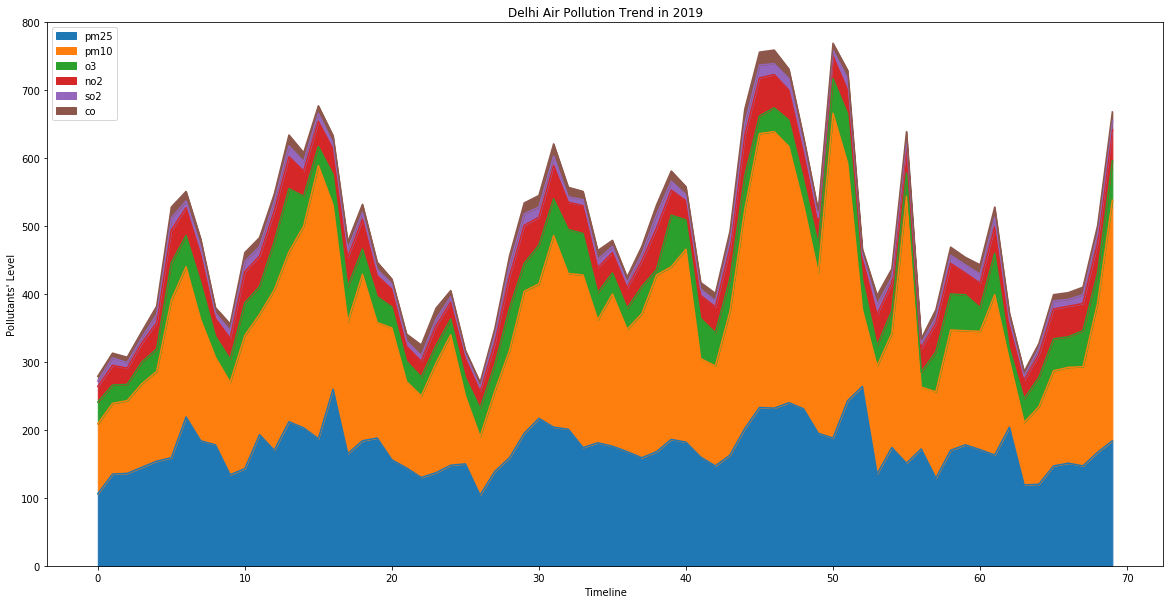

In [61]:
# Create an stacked area chart for the pollutant levels in 2019
ax = delhi_2019_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,800)
# Creat tite, x and y label
plt.title("Delhi Air Pollution Trend in 2019")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

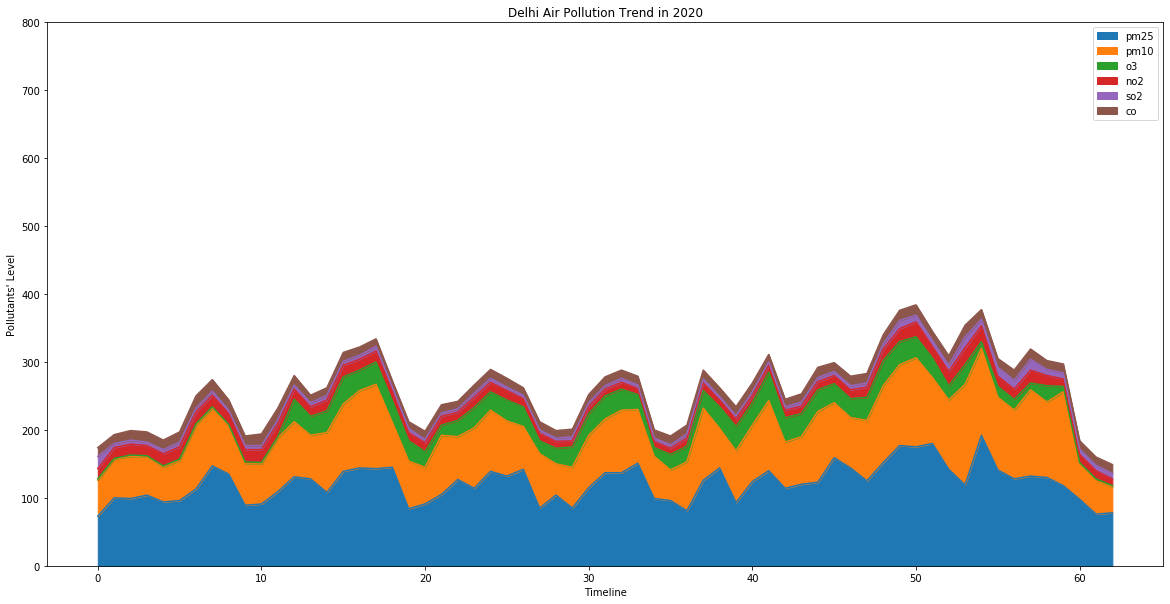

In [62]:
# Create an stacked area chart for the pollutant levels in lockdown period
ax = delhi_lockdown_df[['pm25', 'pm10', 'o3', 'no2', 'so2', 'co']].plot.area(figsize=(20,10))
# set y limit
plt.ylim(0,800)
# Creat tite, x and y label
plt.title("Delhi Air Pollution Trend in 2020")
plt.xlabel("Timeline")
plt.ylabel("Pollutants' Level")
plt.show()

In [28]:
# Compute quartiles and upper and lower bounds for pm25 in 2019
delhi_2019_quartiles = delhi_2019_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_2019_lowerq = delhi_2019_quartiles[0.25]

# Compute the upper quartile
delhi_2019_upperq = delhi_2019_quartiles[0.75]
delhi_2019_iqr = delhi_2019_upperq-delhi_2019_lowerq
print(f"The lower quartile of delhi_2019  is: {delhi_2019_lowerq}")
print(f"The upper quartile of delhi_2019 is: {delhi_2019_upperq}")
print(f"The interquartile range of delhi_2019 is: {delhi_2019_iqr}")
lower_bound = delhi_2019_lowerq - (1.5*delhi_2019_iqr)
upper_bound = delhi_2019_upperq + (1.5*delhi_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_2019 = delhi_2019_df.loc[(delhi_2019_df["pm25"] < lower_bound) | (delhi_2019_df["pm25"] > upper_bound)]


The lower quartile of delhi_2019  is: 147.25
The upper quartile of delhi_2019 is: 191.75
The interquartile range of delhi_2019 is: 44.5
Values below 80.5 could be outliers.
Values above 258.5 could be outliers.


In [29]:
# Compute quartiles and upper and lower bounds for pm10
delhi_2019_quartiles = delhi_2019_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_2019_lowerq = delhi_2019_quartiles[0.25]

# Compute the upper quartile
delhi_2019_upperq = delhi_2019_quartiles[0.75]
delhi_2019_iqr = delhi_2019_upperq-delhi_2019_lowerq
print(f"The lower quartile of delhi_2019  is: {delhi_2019_lowerq}")
print(f"The upper quartile of delhi_2019 is: {delhi_2019_upperq}")
print(f"The interquartile range of delhi_2019 is: {delhi_2019_iqr}")
lower_bound = delhi_2019_lowerq - (1.5*delhi_2019_iqr)
upper_bound = delhi_2019_upperq + (1.5*delhi_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_2019 = delhi_2019_df.loc[(delhi_2019_df["pm10"] < lower_bound) | (delhi_2019_df["pm10"] > upper_bound)]


The lower quartile of delhi_2019  is: 137.0
The upper quartile of delhi_2019 is: 248.75
The interquartile range of delhi_2019 is: 111.75
Values below -30.625 could be outliers.
Values above 416.375 could be outliers.


In [30]:
# Compute quartiles and upper and lower bounds for o3
delhi_quartiles = delhi_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lowerq = delhi_quartiles[0.25]

# Compute the upper quartile
delhi_upperq = delhi_quartiles[0.75]
delhi_iqr = delhi_upperq-delhi_lowerq
print(f"The lower quartile of delhi  is: {delhi_lowerq}")
print(f"The upper quartile of delhi is: {delhi_upperq}")
print(f"The interquartile range of delhi is: {delhi_iqr}")
lower_bound = delhi_lowerq - (1.5*delhi_iqr)
upper_bound = delhi_upperq + (1.5*delhi_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi = delhi_df.loc[(delhi_df["o3"] < lower_bound) | (delhi_df["o3"] > upper_bound)]


The lower quartile of delhi  is: 6.0
The upper quartile of delhi is: 31.0
The interquartile range of delhi is: 25.0
Values below -31.5 could be outliers.
Values above 68.5 could be outliers.


In [31]:
# Compute quartiles and upper and lower bounds for no2
delhi_2019_quartiles = delhi_2019_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_2019_lowerq = delhi_2019_quartiles[0.25]

# Compute the upper quartile
delhi_2019_upperq = delhi_2019_quartiles[0.75]
delhi_2019_iqr = delhi_2019_upperq-delhi_2019_lowerq
print(f"The lower quartile of delhi_2019  is: {delhi_2019_lowerq}")
print(f"The upper quartile of delhi_2019 is: {delhi_2019_upperq}")
print(f"The interquartile range of delhi_2019 is: {delhi_2019_iqr}")
lower_bound = delhi_2019_lowerq - (1.5*delhi_2019_iqr)
upper_bound = delhi_2019_upperq + (1.5*delhi_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_2019 = delhi_2019_df.loc[(delhi_2019_df["no2"] < lower_bound) | (delhi_2019_df["no2"] > upper_bound)]


The lower quartile of delhi_2019  is: 30.25
The upper quartile of delhi_2019 is: 44.0
The interquartile range of delhi_2019 is: 13.75
Values below 9.625 could be outliers.
Values above 64.625 could be outliers.


In [32]:
# Compute quartiles and upper and lower bounds for so2
delhi_2019_quartiles = delhi_2019_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_2019_lowerq = delhi_2019_quartiles[0.25]

# Compute the upper quartile
delhi_2019_upperq = delhi_2019_quartiles[0.75]
delhi_2019_iqr = delhi_2019_upperq-delhi_2019_lowerq
print(f"The lower quartile of delhi_2019  is: {delhi_2019_lowerq}")
print(f"The upper quartile of delhi_2019 is: {delhi_2019_upperq}")
print(f"The interquartile range of delhi_2019 is: {delhi_2019_iqr}")
lower_bound = delhi_2019_lowerq - (1.5*delhi_2019_iqr)
upper_bound = delhi_2019_upperq + (1.5*delhi_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_2019 = delhi_2019_df.loc[(delhi_2019_df["so2"] < lower_bound) | (delhi_2019_df["so2"] > upper_bound)]


The lower quartile of delhi_2019  is: 9.0
The upper quartile of delhi_2019 is: 14.0
The interquartile range of delhi_2019 is: 5.0
Values below 1.5 could be outliers.
Values above 21.5 could be outliers.


In [33]:
# Compute quartiles and upper and lower bounds for co
delhi_2019_quartiles = delhi_2019_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_2019_lowerq = delhi_2019_quartiles[0.25]

# Compute the upper quartile
delhi_2019_upperq = delhi_2019_quartiles[0.75]
delhi_2019_iqr = delhi_2019_upperq-delhi_2019_lowerq
print(f"The lower quartile of delhi_2019  is: {delhi_2019_lowerq}")
print(f"The upper quartile of delhi_2019 is: {delhi_2019_upperq}")
print(f"The interquartile range of delhi_2019 is: {delhi_2019_iqr}")
lower_bound = delhi_2019_lowerq - (1.5*delhi_2019_iqr)
upper_bound = delhi_2019_upperq + (1.5*delhi_2019_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_2019 = delhi_2019_df.loc[(delhi_2019_df["co"] < lower_bound) | (delhi_2019_df["co"] > upper_bound)]


The lower quartile of delhi_2019  is: 10.0
The upper quartile of delhi_2019 is: 13.75
The interquartile range of delhi_2019 is: 3.75
Values below 4.375 could be outliers.
Values above 19.375 could be outliers.


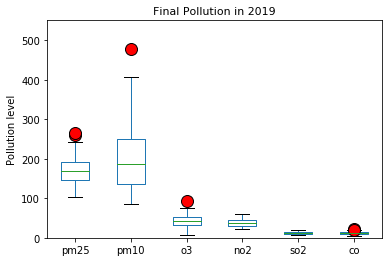

In [35]:

# Create a box plot with outliers
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = delhi_2019_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# Set y limit
plt.ylim(0,550)
# Set the title and y axis label
box_plot.set_title('Pollution in 2019', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [36]:
# Compute quartiles and upper and lower bounds for pm25
delhi_lockdown_quartiles =delhi_lockdown_df["pm25"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lockdown_lowerq = delhi_lockdown_quartiles[0.25]

# Compute the upper quartile
delhi_lockdown_upperq = delhi_lockdown_quartiles[0.75]
delhi_lockdown_iqr = delhi_lockdown_upperq-delhi_lockdown_lowerq
print(f"The lower quartile of delhi in lockdown is: {delhi_lockdown_lowerq}")
print(f"The upper quartile of delhi in lockdown is: {delhi_lockdown_upperq}")
print(f"The interquartile range of delhi in lockdown is: {delhi_lockdown_iqr}")
lower_bound = delhi_lockdown_lowerq - (1.5*delhi_lockdown_iqr)
upper_bound =delhi_lockdown_upperq + (1.5*delhi_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_lockdown = delhi_lockdown_df.loc[(delhi_lockdown_df["pm25"] < lower_bound) | (delhi_lockdown_df["pm25"] > upper_bound)]
outlier_delhi_lockdown

The lower quartile of delhi in lockdown is: 99.0
The upper quartile of delhi in lockdown is: 140.5
The interquartile range of delhi in lockdown is: 41.5
Values below 36.75 could be outliers.
Values above 202.75 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [37]:
# Compute quartiles and upper and lower bounds for pm10
delhi_lockdown_quartiles =delhi_lockdown_df["pm10"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lockdown_lowerq = delhi_lockdown_quartiles[0.25]

# Compute the upper quartile
delhi_lockdown_upperq = delhi_lockdown_quartiles[0.75]
delhi_lockdown_iqr = delhi_lockdown_upperq-delhi_lockdown_lowerq
print(f"The lower quartile of delhi in lockdown is: {delhi_lockdown_lowerq}")
print(f"The upper quartile of delhi in lockdown is: {delhi_lockdown_upperq}")
print(f"The interquartile range of delhi in lockdown is: {delhi_lockdown_iqr}")
lower_bound = delhi_lockdown_lowerq - (1.5*delhi_lockdown_iqr)
upper_bound =delhi_lockdown_upperq + (1.5*delhi_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_lockdown = delhi_lockdown_df.loc[(delhi_lockdown_df["pm10"] < lower_bound) | (delhi_lockdown_df["pm10"] > upper_bound)]
outlier_delhi_lockdown

The lower quartile of delhi in lockdown is: 62.0
The upper quartile of delhi in lockdown is: 100.0
The interquartile range of delhi in lockdown is: 38.0
Values below 5.0 could be outliers.
Values above 157.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [38]:
# Compute quartiles and upper and lower bounds for o3
delhi_lockdown_quartiles =delhi_lockdown_df["o3"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lockdown_lowerq = delhi_lockdown_quartiles[0.25]

# Compute the upper quartile
delhi_lockdown_upperq = delhi_lockdown_quartiles[0.75]
delhi_lockdown_iqr = delhi_lockdown_upperq-delhi_lockdown_lowerq
print(f"The lower quartile of delhi in lockdown is: {delhi_lockdown_lowerq}")
print(f"The upper quartile of delhi in lockdown is: {delhi_lockdown_upperq}")
print(f"The interquartile range of delhi in lockdown is: {delhi_lockdown_iqr}")
lower_bound = delhi_lockdown_lowerq - (1.5*delhi_lockdown_iqr)
upper_bound =delhi_lockdown_upperq + (1.5*delhi_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_lockdown = delhi_lockdown_df.loc[(delhi_lockdown_df["o3"] < lower_bound) | (delhi_lockdown_df["o3"] > upper_bound)]
outlier_delhi_lockdown

The lower quartile of delhi in lockdown is: 9.0
The upper quartile of delhi in lockdown is: 32.0
The interquartile range of delhi in lockdown is: 23.0
Values below -25.5 could be outliers.
Values above 66.5 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,


In [39]:
# Compute quartiles and upper and lower bounds for no2
delhi_lockdown_quartiles =delhi_lockdown_df["no2"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lockdown_lowerq = delhi_lockdown_quartiles[0.25]

# Compute the upper quartile
delhi_lockdown_upperq = delhi_lockdown_quartiles[0.75]
delhi_lockdown_iqr = delhi_lockdown_upperq-delhi_lockdown_lowerq
print(f"The lower quartile of delhi in lockdown is: {delhi_lockdown_lowerq}")
print(f"The upper quartile of delhi in lockdown is: {delhi_lockdown_upperq}")
print(f"The interquartile range of delhi in lockdown is: {delhi_lockdown_iqr}")
lower_bound = delhi_lockdown_lowerq - (1.5*delhi_lockdown_iqr)
upper_bound =delhi_lockdown_upperq + (1.5*delhi_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_lockdown = delhi_lockdown_df.loc[(delhi_lockdown_df["no2"] < lower_bound) | (delhi_lockdown_df["no2"] > upper_bound)]
outlier_delhi_lockdown

The lower quartile of delhi in lockdown is: 11.0
The upper quartile of delhi in lockdown is: 16.5
The interquartile range of delhi in lockdown is: 5.5
Values below 2.75 could be outliers.
Values above 24.75 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-05-22,119,148,29,25,16,17,148


In [40]:
# Compute quartiles and upper and lower bounds for so2
delhi_lockdown_quartiles =delhi_lockdown_df["so2"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lockdown_lowerq = delhi_lockdown_quartiles[0.25]

# Compute the upper quartile
delhi_lockdown_upperq = delhi_lockdown_quartiles[0.75]
delhi_lockdown_iqr = delhi_lockdown_upperq-delhi_lockdown_lowerq
print(f"The lower quartile of delhi in lockdown is: {delhi_lockdown_lowerq}")
print(f"The upper quartile of delhi in lockdown is: {delhi_lockdown_upperq}")
print(f"The interquartile range of delhi in lockdown is: {delhi_lockdown_iqr}")
lower_bound = delhi_lockdown_lowerq - (1.5*delhi_lockdown_iqr)
upper_bound =delhi_lockdown_upperq + (1.5*delhi_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_lockdown = delhi_lockdown_df.loc[(delhi_lockdown_df["so2"] < lower_bound) | (delhi_lockdown_df["so2"] > upper_bound)]
outlier_delhi_lockdown

The lower quartile of delhi in lockdown is: 5.0
The upper quartile of delhi in lockdown is: 7.5
The interquartile range of delhi in lockdown is: 2.5
Values below 1.25 could be outliers.
Values above 11.25 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-03-30,73,53,2,15,18,13,73
2020-05-18,177,119,34,19,12,15,177
2020-05-22,119,148,29,25,16,17,148
2020-05-24,141,107,16,15,13,13,141
2020-05-25,128,101,16,15,13,15,128
2020-05-26,132,127,10,19,16,15,132


In [41]:
# Compute quartiles and upper and lower bounds for co
delhi_lockdown_quartiles =delhi_lockdown_df["co"].quantile([.25,.5,.75])
# Compute the lower quartile
delhi_lockdown_lowerq = delhi_lockdown_quartiles[0.25]

# Compute the upper quartile
delhi_lockdown_upperq = delhi_lockdown_quartiles[0.75]
delhi_lockdown_iqr = delhi_lockdown_upperq-delhi_lockdown_lowerq
print(f"The lower quartile of delhi in lockdown is: {delhi_lockdown_lowerq}")
print(f"The upper quartile of delhi in lockdown is: {delhi_lockdown_upperq}")
print(f"The interquartile range of delhi in lockdown is: {delhi_lockdown_iqr}")
lower_bound = delhi_lockdown_lowerq - (1.5*delhi_lockdown_iqr)
upper_bound =delhi_lockdown_upperq + (1.5*delhi_lockdown_iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
# Compute the outliers
outlier_delhi_lockdown = delhi_lockdown_df.loc[(delhi_lockdown_df["co"] < lower_bound) | (delhi_lockdown_df["co"] > upper_bound)]
outlier_delhi_lockdown

The lower quartile of delhi in lockdown is: 12.0
The upper quartile of delhi in lockdown is: 14.0
The interquartile range of delhi in lockdown is: 2.0
Values below 9.0 could be outliers.
Values above 17.0 could be outliers.


,pm25,pm10,o3,no2,so2,co,AQI
date,,,,,,,
2020-04-05,113,94,2,17,6,18,113


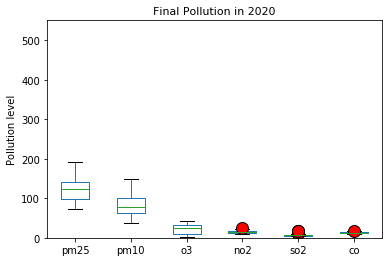

In [43]:

# Create a box plot with outliers
# plot. Set color of marker face and marker edge

flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
box_plot = delhi_lockdown_df.boxplot(grid=False, column=['pm25','pm10', 'o3', 'no2', 'so2', 'co'], flierprops=flierprops)
# Set y limit
plt.ylim(0,550)
# Set the title and y axis label
box_plot.set_title('Pollution in 2020', fontsize=11)
box_plot.set_ylabel("Pollution level")
plt.show()

In [48]:
# Reset index
delhi_lockdown_df = delhi_lockdown_df.reset_index("date")


,date,pm25,pm10,o3,no2,so2,co,AQI
0,2020-03-30,73,53,2,15,18,13,73
1,2020-03-31,100,57,1,16,6,13,100
2,2020-04-01,99,62,2,16,6,14,99
3,2020-04-02,104,56,2,15,5,15,104
4,2020-04-03,94,51,2,18,6,14,94
...,...,...,...,...,...,...,...,...
58,2020-05-27,130,111,24,15,9,13,130
59,2020-05-28,118,138,8,11,9,13,138
60,2020-05-29,98,52,2,12,8,12,98
61,2020-05-30,76,49,3,12,8,12,76


In [50]:
# Extract the month-day from the date and create a new column
delhi_lockdown_df["new_date"] = delhi_lockdown_df["date"].dt.strftime("%m-%d")
delhi_lockdown_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2020-03-30,73,53,2,15,18,13,73,03-30
1,2020-03-31,100,57,1,16,6,13,100,03-31
2,2020-04-01,99,62,2,16,6,14,99,04-01
3,2020-04-02,104,56,2,15,5,15,104,04-02
4,2020-04-03,94,51,2,18,6,14,94,04-03
...,...,...,...,...,...,...,...,...,...
58,2020-05-27,130,111,24,15,9,13,130,05-27
59,2020-05-28,118,138,8,11,9,13,138,05-28
60,2020-05-29,98,52,2,12,8,12,98,05-29
61,2020-05-30,76,49,3,12,8,12,76,05-30


In [51]:
# Reset index
delhi_2019_df = delhi_2019_df.reset_index("date")


In [52]:
# Extract the month-day from the date and create a new column
delhi_2019_df["new_date"] = delhi_2019_df["date"].dt.strftime("%m-%d")
delhi_2019_df

,date,pm25,pm10,o3,no2,so2,co,AQI,new_date
0,2019-03-23,106,103,32,23,8,7,106,03-23
1,2019-03-24,135,104,27,29,11,7,135,03-24
2,2019-03-25,136,107,24,24,8,8,136,03-25
3,2019-03-26,145,123,32,28,8,9,145,03-26
4,2019-03-27,154,132,33,39,12,12,154,03-27
...,...,...,...,...,...,...,...,...,...
65,2019-05-27,147,140,47,44,12,9,147,05-27
66,2019-05-28,151,141,45,45,10,10,151,05-28
67,2019-05-29,147,146,53,40,13,11,147,05-29
68,2019-05-30,167,220,44,44,14,12,220,05-30


In [53]:
# Merge two data sets
new_delhi_df = delhi_2019_df.merge(delhi_lockdown_df, on= "new_date")
new_delhi_df

,date_x,pm25_x,pm10_x,o3_x,no2_x,so2_x,co_x,AQI_x,new_date,date_y,pm25_y,pm10_y,o3_y,no2_y,so2_y,co_y,AQI_y
0,2019-03-30,184,178,55,41,12,11,184,03-30,2020-03-30,73,53,2,15,18,13,73
1,2019-03-31,178,129,31,26,8,8,178,03-31,2020-03-31,100,57,1,16,6,13,100
2,2019-04-01,134,136,34,31,11,10,136,04-01,2020-04-01,99,62,2,16,6,14,99
3,2019-04-02,143,196,48,46,15,13,196,04-02,2020-04-02,104,56,2,15,5,15,104
4,2019-04-03,193,177,41,45,14,13,193,04-03,2020-04-03,94,51,2,18,6,14,94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2019-05-27,147,140,47,44,12,9,147,05-27,2020-05-27,130,111,24,15,9,13,130
59,2019-05-28,151,141,45,45,10,10,151,05-28,2020-05-28,118,138,8,11,9,13,138
60,2019-05-29,147,146,53,40,13,11,147,05-29,2020-05-29,98,52,2,12,8,12,98
61,2019-05-30,167,220,44,44,14,12,220,05-30,2020-05-30,76,49,3,12,8,12,76


In [55]:
# Rename the columns for intuitive naming
new_delhi_df = new_delhi_df.rename(columns={'date_x':'Date 2019', 'pm25_x':'2019 pm25', 'pm10_x':'2019 pm10', 'o3_x':'2019 o3', 'no2_x':'2019 no2', 'so2_x':'2019 so2', 'co_x':'2019 co', 'AQI_x':'2019 AQI', 'date_y':'Date 2020', 'pm25_y':'2020 pm25', 'pm10_y':'2020 pm10', 'o3_y':'2020 o3', 'no2_y':'2020 no2', 'so2_y':'2020 so2', 'co_y':'2020 co', 'AQI_y':'2020 AQI'})
new_delhi_df.head()

,Date 2019,2019 pm25,2019 pm10,2019 o3,2019 no2,2019 so2,2019 co,2019 AQI,new_date,Date 2020,2020 pm25,2020 pm10,2020 o3,2020 no2,2020 so2,2020 co,2020 AQI
0,2019-03-30,184,178,55,41,12,11,184,03-30,2020-03-30,73,53,2,15,18,13,73
1,2019-03-31,178,129,31,26,8,8,178,03-31,2020-03-31,100,57,1,16,6,13,100
2,2019-04-01,134,136,34,31,11,10,136,04-01,2020-04-01,99,62,2,16,6,14,99
3,2019-04-02,143,196,48,46,15,13,196,04-02,2020-04-02,104,56,2,15,5,15,104
4,2019-04-03,193,177,41,45,14,13,193,04-03,2020-04-03,94,51,2,18,6,14,94


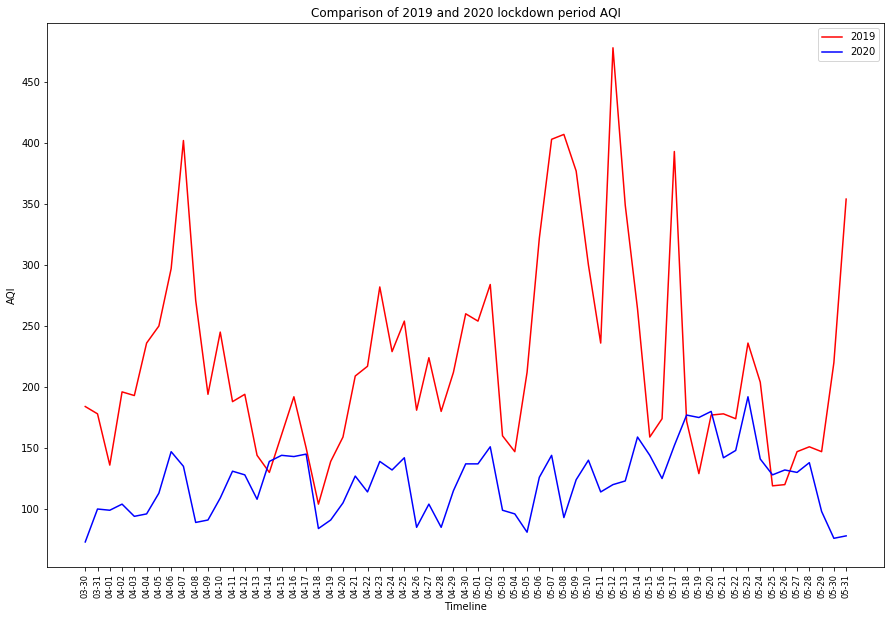

In [56]:
# Create a line plot that compares AQI for lockdown periods between 2019 and 2020
x_axis=new_delhi_df["new_date"]
y_axis=new_delhi_df["2019 AQI"]
x2=new_delhi_df["new_date"]
y2=new_delhi_df["2020 AQI"]

plt.figure(figsize=(15,10))
plt.xticks(rotation=90, size='small')
plt.plot(x_axis,y_axis, color="red", label="2019")
plt.plot(x2,y2,  color="blue", label="2020")
# Create a legend for our chart
plt.legend(loc="best")
# set the title and label for the plot
plt.title("Comparison of 2019 and 2020 lockdown period AQI")
plt.xlabel("Timeline")
plt.ylabel("Level of AQI")
plt.show()

In [57]:
# Compute a mean of the pollutants during the same months in 2019 as lockdown period in 2020
delhi_2019_mean = delhi_2019_df.mean()
delhi_2019_mean[0:6]

pm25    173.042857
pm10    205.900000
o3       42.828571
no2      37.842857
so2      11.442857
co       11.685714
dtype: float64

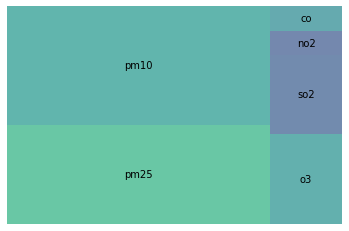

In [58]:
# Create a treemap for the pollutants for the period in 2019
squarify.plot(sizes=delhi_2019_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co"], alpha=.6)
plt.axis('off')
plt.show()

In [59]:
# Compute a mean of the pollutants during the lockdown period
delhi_lockdown_mean = delhi_lockdown_df.mean()
delhi_lockdown_mean[0:6]

pm25    121.619048
pm10     82.301587
o3       21.333333
no2      14.206349
so2       7.047619
co       13.142857
dtype: float64

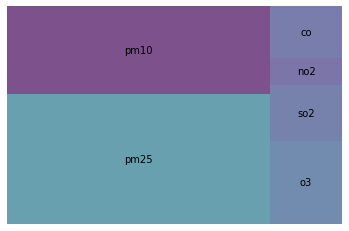

In [60]:
# Create a treemap for the pollutants for the lockdown period in 2020
squarify.plot(sizes=delhi_lockdown_mean[0:6], label=["pm25", "pm10", "o3", "so2", "no2", "co"], alpha=.6)
plt.axis('off')
plt.show()